In [3]:
import matplotlib.pylab as plt
import numpy as np
from skimage import io, color, filters, morphology, util
from skimage.morphology import disk, erosion, closing, square, diamond, dilation, black_tophat, white_tophat, opening
import skimage.exposure as exp
import imutils
import cv2

In [4]:
def stretch_image(image):
    floodRed = image[:,:,0]
    floodGreen = image[:,:,1]
    floodBlue = image[:,:,2]

    stretchRed = exp.rescale_intensity(floodRed, in_range=(np.percentile(floodRed,2), np.percentile(floodRed,98)))
    stretchGreen = exp.rescale_intensity(floodGreen, in_range=(np.percentile(floodGreen,2), np.percentile(floodGreen,98)))
    stretchBlue = exp.rescale_intensity(floodBlue, in_range=(np.percentile(floodBlue,2), np.percentile(floodBlue,98)))

    stretchFlood = np.stack([stretchRed, stretchGreen, stretchBlue], axis=2)

    return stretchFlood

In [5]:
def showHsv(stretched):
    floodHsv = cv2.cvtColor(stretched, cv2.COLOR_RGB2HSV)
    hueFlood = floodHsv[:,:,0]
    saturationFlood = floodHsv[:,:,1]
    vueFlood = floodHsv[:,:,2]

    plt.figure(figsize=(21, 6))
    plt.title('Cmap = "gray"'); plt.axis('off')
    plt.subplot(1,3,1)
    plt.imshow(hueFlood, cmap='gray')
    plt.title('Hue Channel')
    plt.colorbar()

    plt.subplot(1,3,2)
    plt.imshow(saturationFlood, cmap='gray')
    plt.title('Saturation Channel')
    plt.colorbar()

    plt.subplot(1,3,3)
    plt.imshow(vueFlood, cmap='gray')
    plt.title('Vue Channel')

    plt.figure(figsize=(21,6))
    plt.title('Cmap = "hsv"'); plt.axis('off')

    plt.subplot(1,3,1)
    plt.imshow(hueFlood, cmap='hsv')
    plt.title('Hue Channel')
    plt.colorbar()

    plt.subplot(1,3,2)
    plt.imshow(saturationFlood, cmap='hsv')
    plt.title('Saturation Channel')
    plt.colorbar()

    plt.subplot(1,3,3)
    plt.imshow(vueFlood, cmap='hsv')
    plt.title('Vue Channel')
    plt.colorbar()

(-0.5, 1999.5, 1499.5, -0.5)

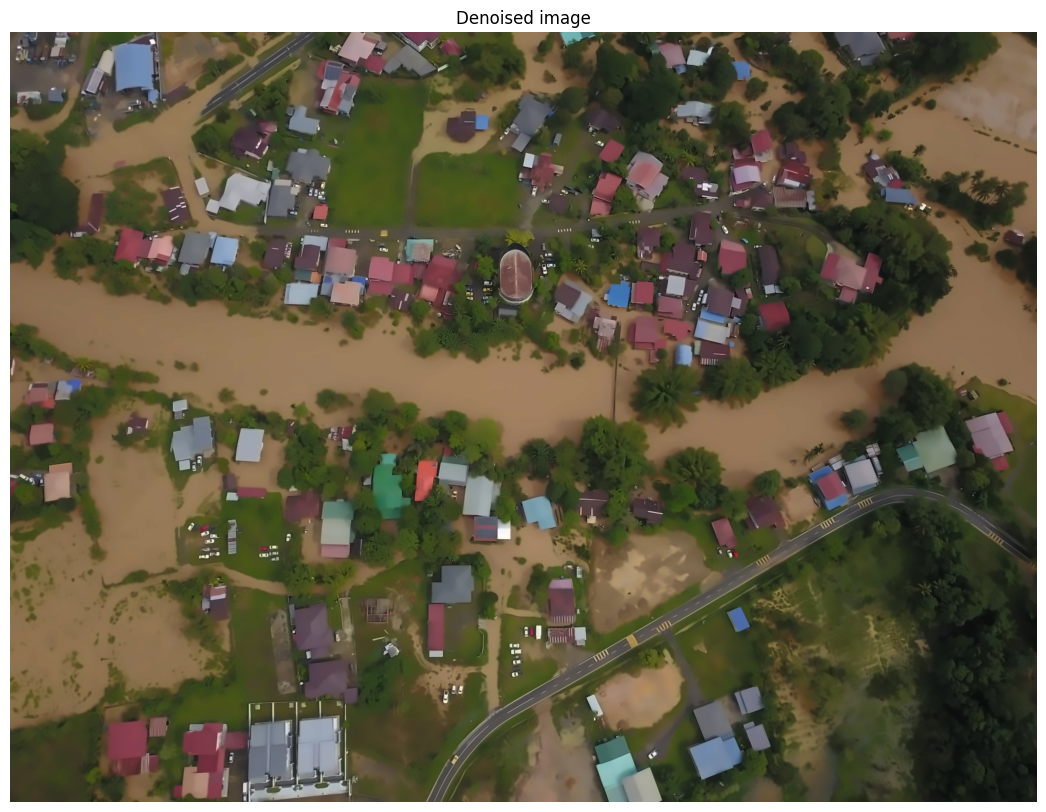

In [66]:
image_process = io.imread(f'./Image/7.jpg')
# print(image_process.shape)
image_process = np.squeeze(image_process)
denoised_image = cv2.fastNlMeansDenoisingColored(image_process, None, 10, 10, 7, 21)
# strecthing = stretch_image(denoised_image)
plt.figure(figsize=(16,10))
# plt.subplot(1,2,1)
# plt.imshow(image_process)
# plt.title('Original RGB image'); plt.axis('off')
# plt.subplot(1,2,2)
plt.imshow(denoised_image)
plt.title('Denoised image'); plt.axis('off') 
# plt.subplot(1,3,3)
# plt.imshow(strecthing)
# plt.title('Stretch Denoised image'); plt.axis('off') 


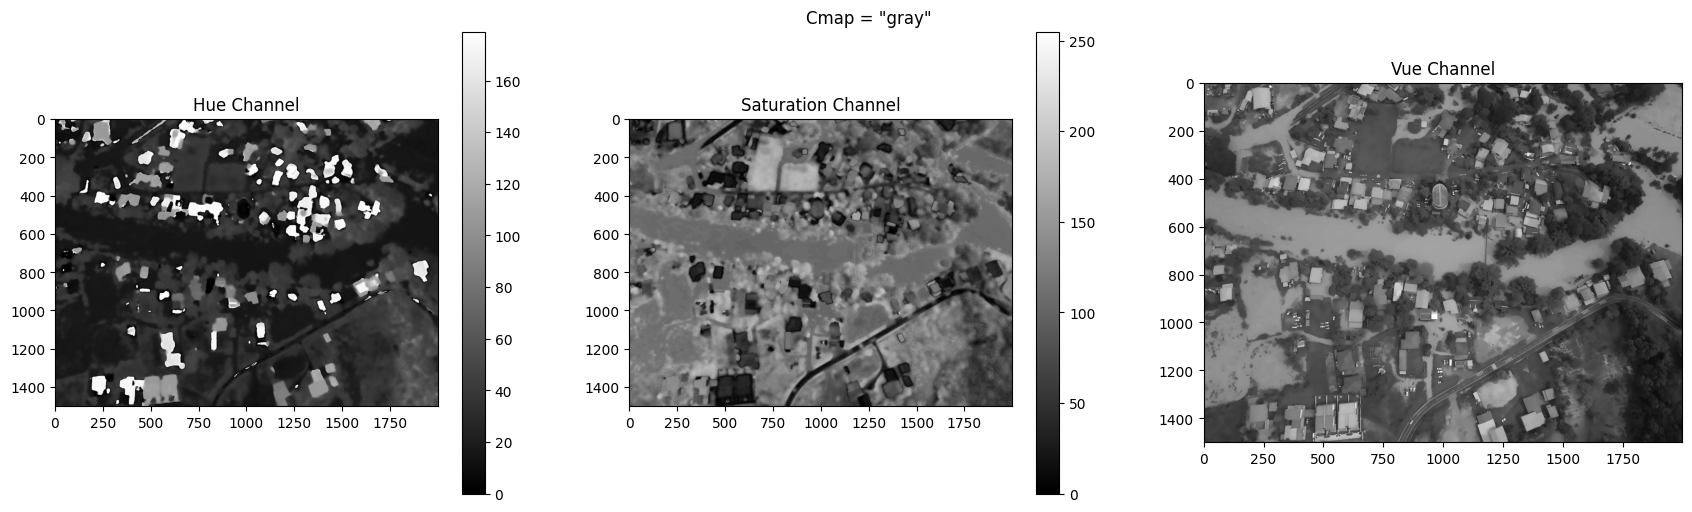

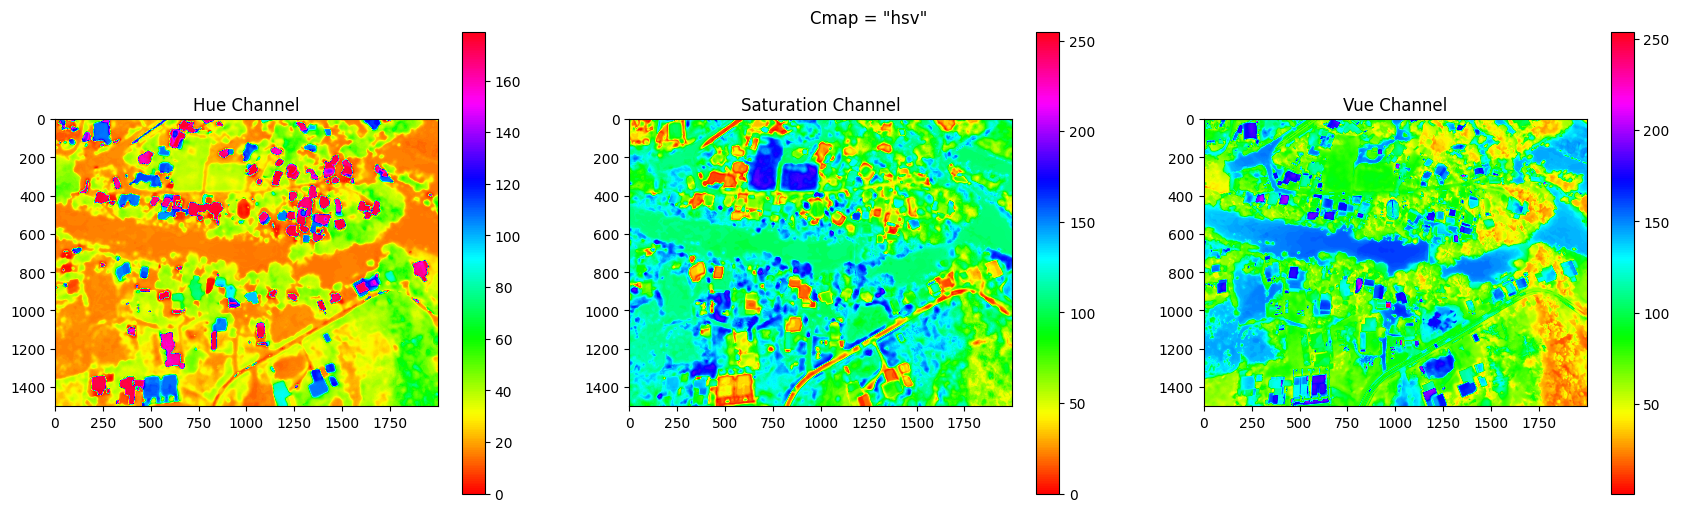

In [67]:
showHsv(denoised_image)

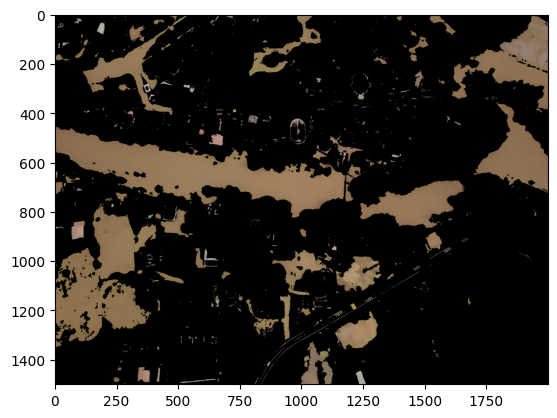

In [68]:
imageHsv = cv2.cvtColor(denoised_image, cv2.COLOR_RGB2HSV)
lower2 = (5, 0, 130)
upper2 = (30, 255, 210)
# lower3 = (0, , 160)
# upper3 = (255, 200, 255)
mask2 = cv2.inRange(imageHsv, lower2, upper2)
# mask3 = cv2.inRange(imageHsv, lower3, upper3)
# mask23 = cv2.bitwise_or(mask2, mask3)
image_detected = cv2.bitwise_and(denoised_image, denoised_image, mask=mask2)
# image_detected = imutils.rotate(image_detected, angle=180)
plt.imshow(image_detected)

In [70]:
# print(image_detected.shape)
image_gray = color.rgb2gray(image_detected[:,:,:3])
wanted = io.imread('./Mask/7.png')
wanted_resized = cv2.resize(wanted, (image_gray.shape[1], image_gray.shape[0]))
intersection = np.logical_and(image_gray, wanted_resized)
union = np.logical_or(image_gray, wanted_resized)
iou = np.sum(intersection) / np.sum(union)
print("iou: " , iou)

iou:  0.6354485638114554


In [4]:
def conventional(counter):
    if counter == 14 :
        image_counter = 14
        wanted_counter = 15
    elif counter == 15:
        image_counter = 15
        wanted_counter = 14
    elif counter == 2053:
        image_counter = 2053
        wanted_counter = 2052
    elif counter == 2052:
        image_counter = 2052
        wanted_counter = 2053
    else :
        image_counter = counter
        wanted_counter = counter
        
    image_process = io.imread(f'./Image/{image_counter}.jpg')
    if counter == 2018:
        image_process = imutils.rotate(image_process, angle=180)
    image_process = np.squeeze(image_process)
    denoised = cv2.fastNlMeansDenoisingColored(image_process, None, 10, 10, 7, 21)
    imageHsv = cv2.cvtColor(denoised, cv2.COLOR_RGB2HSV)
    
    
    lower1 = (0, 50, 110)
    upper1 = (30, 255, 255)
    mask1 = cv2.inRange(imageHsv, lower1, upper1)
    image_detected1 = cv2.bitwise_and(denoised, denoised, mask=mask1)
    image_gray1 = color.rgb2gray(image_detected1[:,:,:3])
    wanted1 = io.imread(f'./Mask/{wanted_counter}.png')
    wanted_resized1 = cv2.resize(wanted1, (image_gray1.shape[1], image_gray1.shape[0]))
    intersection1 = np.logical_and(image_gray1, wanted_resized1)
    union1 = np.logical_or(image_gray1, wanted_resized1)
    iou1 = np.sum(intersection1) / np.sum(union1)
    
    lower2 = (0, 0, 160)
    upper2 = (255, 255, 255)
    mask2 = cv2.inRange(imageHsv, lower2, upper2)
    image_detected2 = cv2.bitwise_and(denoised, denoised, mask=mask2)
    image_gray2 = color.rgb2gray(image_detected2[:,:,:3])
    wanted2 = io.imread(f'./Mask/{wanted_counter}.png')
    wanted_resized2 = cv2.resize(wanted2, (image_gray2.shape[1], image_gray2.shape[0]))
    intersection2 = np.logical_and(image_gray2, wanted_resized2)
    union2 = np.logical_or(image_gray2, wanted_resized2)
    iou2 = np.sum(intersection2) / np.sum(union2)
    
    lower3 = (5, 0, 130)
    upper3 = (30, 255, 210)
    mask3 = cv2.inRange(imageHsv, lower3, upper3)
    image_detected3 = cv2.bitwise_and(denoised, denoised, mask=mask3)
    image_gray3 = color.rgb2gray(image_detected3[:,:,:3])
    wanted3 = io.imread(f'./Mask/{wanted_counter}.png')
    wanted_resized3 = cv2.resize(wanted3, (image_gray3.shape[1], image_gray3.shape[0]))
    intersection3 = np.logical_and(image_gray3, wanted_resized3)
    union3 = np.logical_or(image_gray3, wanted_resized3)
    iou3 = np.sum(intersection3) / np.sum(union3)
    
    lower4 = (80, 0, 0)
    upper4 = (255, 50, 255)
    mask4 = cv2.inRange(imageHsv, lower4, upper4)
    image_detected4 = cv2.bitwise_and(denoised, denoised, mask=mask4)
    image_gray4 = color.rgb2gray(image_detected4[:,:,:3])
    wanted4 = io.imread(f'./Mask/{wanted_counter}.png')
    wanted_resized4 = cv2.resize(wanted4, (image_gray4.shape[1], image_gray4.shape[0]))
    intersection4 = np.logical_and(image_gray4, wanted_resized4)
    union4 = np.logical_or(image_gray4, wanted_resized4)
    iou4 = np.sum(intersection4) / np.sum(union4)
    
    lower5 = (0, 0, 150)
    upper5 = (255, 50, 255)
    mask5 = cv2.inRange(imageHsv, lower5, upper5)
    image_detected5 = cv2.bitwise_and(denoised, denoised, mask=mask5)
    image_gray5 = color.rgb2gray(image_detected5[:,:,:3])
    wanted5 = io.imread(f'./Mask/{wanted_counter}.png')
    wanted_resized5 = cv2.resize(wanted5, (image_gray5.shape[1], image_gray5.shape[0]))
    intersection5 = np.logical_and(image_gray5, wanted_resized5)
    union5 = np.logical_or(image_gray5, wanted_resized5)
    iou5 = np.sum(intersection5) / np.sum(union5)
    
    lower6 = (0, 0, 0)
    upper6 = (255, 50, 255)
    mask6 = cv2.inRange(imageHsv, lower6, upper6)
    image_detected6 = cv2.bitwise_and(denoised, denoised, mask=mask6)
    image_gray6 = color.rgb2gray(image_detected6[:,:,:3])
    wanted6 = io.imread(f'./Mask/{wanted_counter}.png')
    wanted_resized6 = cv2.resize(wanted6, (image_gray6.shape[1], image_gray6.shape[0]))
    intersection6 = np.logical_and(image_gray6, wanted_resized6)
    union6 = np.logical_or(image_gray6, wanted_resized6)
    iou6 = np.sum(intersection6) / np.sum(union6)
    
    lower7 = (0, 0, 60)
    upper7 = (255, 255, 140)
    mask7 = cv2.inRange(imageHsv, lower7, upper7)
    image_detected7 = cv2.bitwise_and(denoised, denoised, mask=mask7)
    image_gray7 = color.rgb2gray(image_detected7[:,:,:3])
    wanted7 = io.imread(f'./Mask/{wanted_counter}.png')
    wanted_resized7 = cv2.resize(wanted7, (image_gray7.shape[1], image_gray7.shape[0]))
    intersection7 = np.logical_and(image_gray7, wanted_resized7)
    union7 = np.logical_or(image_gray7, wanted_resized7)
    iou7 = np.sum(intersection7) / np.sum(union7)
    

    maks12 = max(iou1, iou2)
    maks123 = max(maks12, iou3)
    maks1234 = max(maks123, iou4)
    maks12345 = max(maks1234, iou5)
    maks123456 = max(maks12345, iou6)
    maks1234567 = max(maks123456, iou7)
    
    
    print(f"iou {counter}: " , maks1234567)
    # return iou

In [9]:
def iseng(counter):
    if counter == 14 :
        image_counter = 14
        wanted_counter = 15
    elif counter == 15:
        image_counter = 15
        wanted_counter = 14
    elif counter == 2053:
        image_counter = 2053
        wanted_counter = 2052
    elif counter == 2052:
        image_counter = 2052
        wanted_counter = 2053
    else :
        image_counter = counter
        wanted_counter = counter
        
    image_process = io.imread(f'./Image/{image_counter}.jpg')
    if counter == 2018:
        image_process = imutils.rotate(image_process, angle=180)
    image_process = np.squeeze(image_process)
    denoised = cv2.fastNlMeansDenoisingColored(image_process, None, 10, 10, 7, 21)
    imageHsv = cv2.cvtColor(denoised, cv2.COLOR_RGB2HSV)
    
    
    lower1 = (0, 50, 110)
    upper1 = (30, 255, 255)
    mask1 = cv2.inRange(imageHsv, lower1, upper1)
    image_detected1 = cv2.bitwise_and(denoised, denoised, mask=mask1)
    image_gray1 = color.rgb2gray(image_detected1[:,:,:3])
    wanted1 = io.imread(f'./Mask/{wanted_counter}.png')
    wanted_resized1 = cv2.resize(wanted1, (image_gray1.shape[1], image_gray1.shape[0]))
    intersection1 = np.logical_and(image_gray1, wanted_resized1)
    union1 = np.logical_or(image_gray1, wanted_resized1)
    iou1 = np.sum(intersection1) / np.sum(union1)
    
    lower2 = (0, 0, 160)
    upper2 = (255, 255, 255)
    mask2 = cv2.inRange(imageHsv, lower2, upper2)
    image_detected2 = cv2.bitwise_and(denoised, denoised, mask=mask2)
    image_gray2 = color.rgb2gray(image_detected2[:,:,:3])
    wanted2 = io.imread(f'./Mask/{wanted_counter}.png')
    wanted_resized2 = cv2.resize(wanted2, (image_gray2.shape[1], image_gray2.shape[0]))
    intersection2 = np.logical_and(image_gray2, wanted_resized2)
    union2 = np.logical_or(image_gray2, wanted_resized2)
    iou2 = np.sum(intersection2) / np.sum(union2)
    
    lower3 = (5, 0, 130)
    upper3 = (30, 255, 210)
    mask3 = cv2.inRange(imageHsv, lower3, upper3)
    image_detected3 = cv2.bitwise_and(denoised, denoised, mask=mask3)
    image_gray3 = color.rgb2gray(image_detected3[:,:,:3])
    wanted3 = io.imread(f'./Mask/{wanted_counter}.png')
    wanted_resized3 = cv2.resize(wanted3, (image_gray3.shape[1], image_gray3.shape[0]))
    intersection3 = np.logical_and(image_gray3, wanted_resized3)
    union3 = np.logical_or(image_gray3, wanted_resized3)
    iou3 = np.sum(intersection3) / np.sum(union3)
    
    lower4 = (80, 0, 0)
    upper4 = (255, 50, 255)
    mask4 = cv2.inRange(imageHsv, lower4, upper4)
    image_detected4 = cv2.bitwise_and(denoised, denoised, mask=mask4)
    image_gray4 = color.rgb2gray(image_detected4[:,:,:3])
    wanted4 = io.imread(f'./Mask/{wanted_counter}.png')
    wanted_resized4 = cv2.resize(wanted4, (image_gray4.shape[1], image_gray4.shape[0]))
    intersection4 = np.logical_and(image_gray4, wanted_resized4)
    union4 = np.logical_or(image_gray4, wanted_resized4)
    iou4 = np.sum(intersection4) / np.sum(union4)
    
    lower5 = (0, 0, 150)
    upper5 = (255, 50, 255)
    mask5 = cv2.inRange(imageHsv, lower5, upper5)
    image_detected5 = cv2.bitwise_and(denoised, denoised, mask=mask5)
    image_gray5 = color.rgb2gray(image_detected5[:,:,:3])
    wanted5 = io.imread(f'./Mask/{wanted_counter}.png')
    wanted_resized5 = cv2.resize(wanted5, (image_gray5.shape[1], image_gray5.shape[0]))
    intersection5 = np.logical_and(image_gray5, wanted_resized5)
    union5 = np.logical_or(image_gray5, wanted_resized5)
    iou5 = np.sum(intersection5) / np.sum(union5)
    
    lower6 = (0, 0, 0)
    upper6 = (255, 50, 255)
    mask6 = cv2.inRange(imageHsv, lower6, upper6)
    image_detected6 = cv2.bitwise_and(denoised, denoised, mask=mask6)
    image_gray6 = color.rgb2gray(image_detected6[:,:,:3])
    wanted6 = io.imread(f'./Mask/{wanted_counter}.png')
    wanted_resized6 = cv2.resize(wanted6, (image_gray6.shape[1], image_gray6.shape[0]))
    intersection6 = np.logical_and(image_gray6, wanted_resized6)
    union6 = np.logical_or(image_gray6, wanted_resized6)
    iou6 = np.sum(intersection6) / np.sum(union6)
    
    lower7 = (0, 0, 60)
    upper7 = (255, 255, 140)
    mask7 = cv2.inRange(imageHsv, lower7, upper7)
    image_detected7 = cv2.bitwise_and(denoised, denoised, mask=mask7)
    image_gray7 = color.rgb2gray(image_detected7[:,:,:3])
    wanted7 = io.imread(f'./Mask/{wanted_counter}.png')
    wanted_resized7 = cv2.resize(wanted7, (image_gray7.shape[1], image_gray7.shape[0]))
    intersection7 = np.logical_and(image_gray7, wanted_resized7)
    union7 = np.logical_or(image_gray7, wanted_resized7)
    iou7 = np.sum(intersection7) / np.sum(union7)
    
    lower8 = (20, 0, 100)
    upper8 = (40, 255, 150)
    mask8 = cv2.inRange(imageHsv, lower8, upper8)
    image_detected8 = cv2.bitwise_and(denoised, denoised, mask=mask8)
    image_gray8 = color.rgb2gray(image_detected8[:,:,:3])
    wanted8 = io.imread(f'./Mask/{wanted_counter}.png')
    wanted_resized8 = cv2.resize(wanted8, (image_gray8.shape[1], image_gray8.shape[0]))
    intersection8 = np.logical_and(image_gray8, wanted_resized8)
    union8 = np.logical_or(image_gray8, wanted_resized8)
    iou8 = np.sum(intersection8) / np.sum(union8)
    
    lower9 = (0, 0, 150)
    upper9 = (255, 30, 225)
    mask9 = cv2.inRange(imageHsv, lower9, upper9)
    image_detected9 = cv2.bitwise_and(denoised, denoised, mask=mask9)
    image_gray9 = color.rgb2gray(image_detected9[:,:,:3])
    wanted9 = io.imread(f'./Mask/{wanted_counter}.png')
    wanted_resized9 = cv2.resize(wanted9, (image_gray9.shape[1], image_gray9.shape[0]))
    intersection9 = np.logical_and(image_gray9, wanted_resized9)
    union9 = np.logical_or(image_gray9, wanted_resized9)
    iou9 = np.sum(intersection9) / np.sum(union9)
    
    lower10 = (0, 0, 125)
    upper10 = (255, 255, 200)
    mask10 = cv2.inRange(imageHsv, lower10, upper10)
    image_detected10 = cv2.bitwise_and(denoised, denoised, mask=mask10)
    image_gray10 = color.rgb2gray(image_detected10[:,:,:3])
    wanted10 = io.imread(f'./Mask/{wanted_counter}.png')
    wanted_resized10 = cv2.resize(wanted10, (image_gray10.shape[1], image_gray10.shape[0]))
    intersection10 = np.logical_and(image_gray10, wanted_resized10)
    union10 = np.logical_or(image_gray10, wanted_resized10)
    iou10 = np.sum(intersection10) / np.sum(union10)
    
    lower11 = (0, 0, 0)
    upper11 = (20, 255, 255)
    mask11 = cv2.inRange(imageHsv, lower11, upper11)
    image_detected11 = cv2.bitwise_and(denoised, denoised, mask=mask11)
    image_gray11 = color.rgb2gray(image_detected11[:,:,:3])
    wanted11 = io.imread(f'./Mask/{wanted_counter}.png')
    wanted_resized11 = cv2.resize(wanted11, (image_gray11.shape[1], image_gray11.shape[0]))
    intersection11 = np.logical_and(image_gray11, wanted_resized11)
    union11 = np.logical_or(image_gray11, wanted_resized11)
    iou11 = np.sum(intersection11) / np.sum(union11)
    
    lower12 = (0, 0, 190)
    upper12 = (255, 255, 210)
    mask12 = cv2.inRange(imageHsv, lower12, upper12)
    image_detected12 = cv2.bitwise_and(denoised, denoised, mask=mask12)
    image_gray12 = color.rgb2gray(image_detected12[:,:,:3])
    wanted12 = io.imread(f'./Mask/{wanted_counter}.png')
    wanted_resized12 = cv2.resize(wanted12, (image_gray12.shape[1], image_gray12.shape[0]))
    intersection12 = np.logical_and(image_gray12, wanted_resized12)
    union12 = np.logical_or(image_gray12, wanted_resized12)
    iou12 = np.sum(intersection12) / np.sum(union12)

    maks12 = max(iou1, iou2)
    maks123 = max(maks12, iou3)
    maks1234 = max(maks123, iou4)
    maks12345 = max(maks1234, iou5)
    maks123456 = max(maks12345, iou6)
    maks1234567 = max(maks123456, iou7)
    maks12345678 = max(maks1234567, iou8)
    maks123456789 = max(maks12345678, iou9)
    maks12345678910 = max(maks123456789, iou10)    
    maks1234567891011 = max(maks12345678910, iou11)  
    maks123456789101112 = max(maks1234567891011, iou12)      
    
    print(f"iou {counter}: " , maks123456789101112)
    # return maks123456789101112

In [7]:
iseng(2004)

0.2979330733746209

In [10]:
for i in range(10):
    iseng((i))

iou 0:  0.6230199417702502
iou 1:  0.6256976646151252
iou 2:  0.5439045776559173
iou 3:  0.8347062755583516
iou 4:  0.7567884598605954
iou 5:  0.6804202077938822
iou 6:  0.7242416355802319
iou 7:  0.6354485638114554
iou 8:  0.4816332313941269
iou 9:  0.6915729841908318


In [89]:
for i in range(10):
    conventional((i+1040))

iou 1040:  0.5539826238846632
iou 1041:  0.27568324486068885
iou 1042:  0.6772543648248002
iou 1043:  0.5050454290521593
iou 1044:  0.5709694203499898
iou 1045:  0.3012276752803798
iou 1046:  0.392527132282982
iou 1047:  0.5206693147491853
iou 1048:  0.6054806293798757
iou 1049:  0.6949062366580183


In [122]:
def HSV(counter):
    iou_list = []
    image_list = []
    
    if counter == 14 :
        image_counter = 14
        wanted_counter = 15
    elif counter == 15:
        image_counter = 15
        wanted_counter = 14
    elif counter == 2053:
        image_counter = 2053
        wanted_counter = 2052
    elif counter == 2052:
        image_counter = 2052
        wanted_counter = 2053
    else :
        image_counter = counter
        wanted_counter = counter
        
    image_process = io.imread(f'./Image/{image_counter}.jpg')
    if counter == 2018:
        image_process = imutils.rotate(image_process, angle=180)
    image_process = np.squeeze(image_process)
    denoised = cv2.fastNlMeansDenoisingColored(image_process, None, 10, 10, 7, 21)
    imageHsv = cv2.cvtColor(denoised, cv2.COLOR_RGB2HSV)
    
    
    lower1 = (0, 50, 110)
    upper1 = (30, 255, 255)
    mask1 = cv2.inRange(imageHsv, lower1, upper1)
    image_detected1 = cv2.bitwise_and(denoised, denoised, mask=mask1)
    image_gray1 = color.rgb2gray(image_detected1[:,:,:3])
    wanted1 = io.imread(f'./Mask/{wanted_counter}.png')
    wanted_resized1 = cv2.resize(wanted1, (image_gray1.shape[1], image_gray1.shape[0]))
    intersection1 = np.logical_and(image_gray1, wanted_resized1)
    union1 = np.logical_or(image_gray1, wanted_resized1)
    iou1 = np.sum(intersection1) / np.sum(union1)
    iou_list.append(iou1)
    image_list.append(image_gray1)
    
    lower2 = (0, 0, 160)
    upper2 = (255, 255, 255)
    mask2 = cv2.inRange(imageHsv, lower2, upper2)
    image_detected2 = cv2.bitwise_and(denoised, denoised, mask=mask2)
    image_gray2 = color.rgb2gray(image_detected2[:,:,:3])
    wanted2 = io.imread(f'./Mask/{wanted_counter}.png')
    wanted_resized2 = cv2.resize(wanted2, (image_gray2.shape[1], image_gray2.shape[0]))
    intersection2 = np.logical_and(image_gray2, wanted_resized2)
    union2 = np.logical_or(image_gray2, wanted_resized2)
    iou2 = np.sum(intersection2) / np.sum(union2)
    iou_list.append(iou2)
    image_list.append(image_gray2)
    
    
    lower3 = (5, 0, 130)
    upper3 = (30, 255, 210)
    mask3 = cv2.inRange(imageHsv, lower3, upper3)
    image_detected3 = cv2.bitwise_and(denoised, denoised, mask=mask3)
    image_gray3 = color.rgb2gray(image_detected3[:,:,:3])
    wanted3 = io.imread(f'./Mask/{wanted_counter}.png')
    wanted_resized3 = cv2.resize(wanted3, (image_gray3.shape[1], image_gray3.shape[0]))
    intersection3 = np.logical_and(image_gray3, wanted_resized3)
    union3 = np.logical_or(image_gray3, wanted_resized3)
    iou3 = np.sum(intersection3) / np.sum(union3)
    iou_list.append(iou3)
    image_list.append(image_gray3)
    
    
    lower4 = (80, 0, 0)
    upper4 = (255, 50, 255)
    mask4 = cv2.inRange(imageHsv, lower4, upper4)
    image_detected4 = cv2.bitwise_and(denoised, denoised, mask=mask4)
    image_gray4 = color.rgb2gray(image_detected4[:,:,:3])
    wanted4 = io.imread(f'./Mask/{wanted_counter}.png')
    wanted_resized4 = cv2.resize(wanted4, (image_gray4.shape[1], image_gray4.shape[0]))
    intersection4 = np.logical_and(image_gray4, wanted_resized4)
    union4 = np.logical_or(image_gray4, wanted_resized4)
    iou4 = np.sum(intersection4) / np.sum(union4)
    iou_list.append(iou4)
    image_list.append(image_gray4)
    
    
    lower5 = (0, 0, 150)
    upper5 = (255, 50, 255)
    mask5 = cv2.inRange(imageHsv, lower5, upper5)
    image_detected5 = cv2.bitwise_and(denoised, denoised, mask=mask5)
    image_gray5 = color.rgb2gray(image_detected5[:,:,:3])
    wanted5 = io.imread(f'./Mask/{wanted_counter}.png')
    wanted_resized5 = cv2.resize(wanted5, (image_gray5.shape[1], image_gray5.shape[0]))
    intersection5 = np.logical_and(image_gray5, wanted_resized5)
    union5 = np.logical_or(image_gray5, wanted_resized5)
    iou5 = np.sum(intersection5) / np.sum(union5)
    iou_list.append(iou5)
    image_list.append(image_gray5)
    
    
    lower6 = (0, 0, 0)
    upper6 = (255, 50, 255)
    mask6 = cv2.inRange(imageHsv, lower6, upper6)
    image_detected6 = cv2.bitwise_and(denoised, denoised, mask=mask6)
    image_gray6 = color.rgb2gray(image_detected6[:,:,:3])
    wanted6 = io.imread(f'./Mask/{wanted_counter}.png')
    wanted_resized6 = cv2.resize(wanted6, (image_gray6.shape[1], image_gray6.shape[0]))
    intersection6 = np.logical_and(image_gray6, wanted_resized6)
    union6 = np.logical_or(image_gray6, wanted_resized6)
    iou6 = np.sum(intersection6) / np.sum(union6)
    iou_list.append(iou6)
    image_list.append(image_gray6)
    
    lower7 = (0, 0, 60)
    upper7 = (255, 255, 140)
    mask7 = cv2.inRange(imageHsv, lower7, upper7)
    image_detected7 = cv2.bitwise_and(denoised, denoised, mask=mask7)
    image_gray7 = color.rgb2gray(image_detected7[:,:,:3])
    wanted7 = io.imread(f'./Mask/{wanted_counter}.png')
    wanted_resized7 = cv2.resize(wanted7, (image_gray7.shape[1], image_gray7.shape[0]))
    intersection7 = np.logical_and(image_gray7, wanted_resized7)
    union7 = np.logical_or(image_gray7, wanted_resized7)
    iou7 = np.sum(intersection7) / np.sum(union7)
    iou_list.append(iou7)
    image_list.append(image_gray7)
    
    lower8 = (20, 0, 100)
    upper8 = (40, 255, 150)
    mask8 = cv2.inRange(imageHsv, lower8, upper8)
    image_detected8 = cv2.bitwise_and(denoised, denoised, mask=mask8)
    image_gray8 = color.rgb2gray(image_detected8[:,:,:3])
    wanted8 = io.imread(f'./Mask/{wanted_counter}.png')
    wanted_resized8 = cv2.resize(wanted8, (image_gray8.shape[1], image_gray8.shape[0]))
    intersection8 = np.logical_and(image_gray8, wanted_resized8)
    union8 = np.logical_or(image_gray8, wanted_resized8)
    iou8 = np.sum(intersection8) / np.sum(union8)
    iou_list.append(iou8)
    image_list.append(image_gray8)
    
    lower9 = (0, 0, 150)
    upper9 = (255, 30, 225)
    mask9 = cv2.inRange(imageHsv, lower9, upper9)
    image_detected9 = cv2.bitwise_and(denoised, denoised, mask=mask9)
    image_gray9 = color.rgb2gray(image_detected9[:,:,:3])
    wanted9 = io.imread(f'./Mask/{wanted_counter}.png')
    wanted_resized9 = cv2.resize(wanted9, (image_gray9.shape[1], image_gray9.shape[0]))
    intersection9 = np.logical_and(image_gray9, wanted_resized9)
    union9 = np.logical_or(image_gray9, wanted_resized9)
    iou9 = np.sum(intersection9) / np.sum(union9)
    iou_list.append(iou9)
    image_list.append(image_gray9)
    
    lower10 = (0, 0, 125)
    upper10 = (255, 255, 200)
    mask10 = cv2.inRange(imageHsv, lower10, upper10)
    image_detected10 = cv2.bitwise_and(denoised, denoised, mask=mask10)
    image_gray10 = color.rgb2gray(image_detected10[:,:,:3])
    wanted10 = io.imread(f'./Mask/{wanted_counter}.png')
    wanted_resized10 = cv2.resize(wanted10, (image_gray10.shape[1], image_gray10.shape[0]))
    intersection10 = np.logical_and(image_gray10, wanted_resized10)
    union10 = np.logical_or(image_gray10, wanted_resized10)
    iou10 = np.sum(intersection10) / np.sum(union10)
    iou_list.append(iou10)
    image_list.append(image_gray10)
    
    lower11 = (0, 0, 0)
    upper11 = (20, 255, 255)
    mask11 = cv2.inRange(imageHsv, lower11, upper11)
    image_detected11 = cv2.bitwise_and(denoised, denoised, mask=mask11)
    image_gray11 = color.rgb2gray(image_detected11[:,:,:3])
    wanted11 = io.imread(f'./Mask/{wanted_counter}.png')
    wanted_resized11 = cv2.resize(wanted11, (image_gray11.shape[1], image_gray11.shape[0]))
    intersection11 = np.logical_and(image_gray11, wanted_resized11)
    union11 = np.logical_or(image_gray11, wanted_resized11)
    iou11 = np.sum(intersection11) / np.sum(union11)
    iou_list.append(iou11)
    image_list.append(image_gray11)
    
    lower12 = (0, 0, 190)
    upper12 = (255, 255, 210)
    mask12 = cv2.inRange(imageHsv, lower12, upper12)
    image_detected12 = cv2.bitwise_and(denoised, denoised, mask=mask12)
    image_gray12 = color.rgb2gray(image_detected12[:,:,:3])
    wanted12 = io.imread(f'./Mask/{wanted_counter}.png')
    wanted_resized12 = cv2.resize(wanted12, (image_gray12.shape[1], image_gray12.shape[0]))
    intersection12 = np.logical_and(image_gray12, wanted_resized12)
    union12 = np.logical_or(image_gray12, wanted_resized12)
    iou12 = np.sum(intersection12) / np.sum(union12)
    iou_list.append(iou12)
    image_list.append(image_gray12)

    maks12 = max(iou1, iou2)
    maks123 = max(maks12, iou3)
    maks1234 = max(maks123, iou4)
    maks12345 = max(maks1234, iou5)
    maks123456 = max(maks12345, iou6)
    maks1234567 = max(maks123456, iou7)
    maks12345678 = max(maks1234567, iou8)
    maks123456789 = max(maks12345678, iou9)
    maks12345678910 = max(maks123456789, iou10) 
    maks1234567891011 = max(maks12345678910, iou11) 
    maks123456789101112 = max(maks1234567891011, iou12) 
    
    selected_image = image_gray1
    
    for i in range(len(iou_list)):
        if iou_list[i] == maks12345678910:
            selected_image = image_list[i]
            break
    
    return maks123456789101112, selected_image

0.6230199417702502


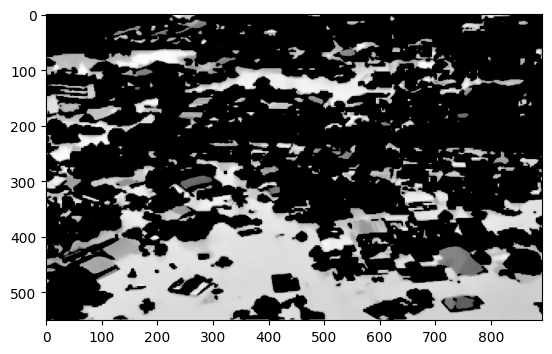

In [125]:
iou, image = HSV(0)
print(iou)
plt.imshow(image, cmap='gray')

In [73]:
def presentasi(counter):
    iou_list = []
    image_list = []
    
    if counter == 14 :
        image_counter = 14
        wanted_counter = 15
    elif counter == 15:
        image_counter = 15
        wanted_counter = 14
    elif counter == 2053:
        image_counter = 2053
        wanted_counter = 2052
    elif counter == 2052:
        image_counter = 2052
        wanted_counter = 2053
    else :
        image_counter = counter
        wanted_counter = counter
        
    image_process = io.imread(f'./Image/{image_counter}.jpg')
    if counter == 2018:
        image_process = imutils.rotate(image_process, angle=180)
    image_process = np.squeeze(image_process)
    denoised = cv2.fastNlMeansDenoisingColored(image_process, None, 10, 10, 7, 21)
    imageHsv = cv2.cvtColor(denoised, cv2.COLOR_RGB2HSV)
    
    
    lower1 = (0, 50, 110)
    upper1 = (30, 255, 255)
    mask1 = cv2.inRange(imageHsv, lower1, upper1)
    image_detected1 = cv2.bitwise_and(denoised, denoised, mask=mask1)
    image_gray1 = color.rgb2gray(image_detected1[:,:,:3])
    wanted1 = io.imread(f'./Mask/{wanted_counter}.png')
    wanted_resized1 = cv2.resize(wanted1, (image_gray1.shape[1], image_gray1.shape[0]))
    intersection1 = np.logical_and(image_gray1, wanted_resized1)
    union1 = np.logical_or(image_gray1, wanted_resized1)
    iou1 = np.sum(intersection1) / np.sum(union1)
    iou_list.append(iou1)
    image_list.append(image_gray1)
    
    # lower2 = (0, 0, 160)
    # upper2 = (255, 255, 255)
    # mask2 = cv2.inRange(imageHsv, lower2, upper2)
    # image_detected2 = cv2.bitwise_and(denoised, denoised, mask=mask2)
    # image_gray2 = color.rgb2gray(image_detected2[:,:,:3])
    # wanted2 = io.imread(f'./Mask/{wanted_counter}.png')
    # wanted_resized2 = cv2.resize(wanted2, (image_gray2.shape[1], image_gray2.shape[0]))
    # intersection2 = np.logical_and(image_gray2, wanted_resized2)
    # union2 = np.logical_or(image_gray2, wanted_resized2)
    # iou2 = np.sum(intersection2) / np.sum(union2)
    # iou_list.append(iou2)
    # image_list.append(image_gray2)
    
    
    lower3 = (5, 0, 130)
    upper3 = (30, 255, 210)
    mask3 = cv2.inRange(imageHsv, lower3, upper3)
    image_detected3 = cv2.bitwise_and(denoised, denoised, mask=mask3)
    image_gray3 = color.rgb2gray(image_detected3[:,:,:3])
    wanted3 = io.imread(f'./Mask/{wanted_counter}.png')
    wanted_resized3 = cv2.resize(wanted3, (image_gray3.shape[1], image_gray3.shape[0]))
    intersection3 = np.logical_and(image_gray3, wanted_resized3)
    union3 = np.logical_or(image_gray3, wanted_resized3)
    iou3 = np.sum(intersection3) / np.sum(union3)
    iou_list.append(iou3)
    image_list.append(image_gray3)
    
    
    # lower4 = (80, 0, 0)
    # upper4 = (255, 50, 255)
    # mask4 = cv2.inRange(imageHsv, lower4, upper4)
    # image_detected4 = cv2.bitwise_and(denoised, denoised, mask=mask4)
    # image_gray4 = color.rgb2gray(image_detected4[:,:,:3])
    # wanted4 = io.imread(f'./Mask/{wanted_counter}.png')
    # wanted_resized4 = cv2.resize(wanted4, (image_gray4.shape[1], image_gray4.shape[0]))
    # intersection4 = np.logical_and(image_gray4, wanted_resized4)
    # union4 = np.logical_or(image_gray4, wanted_resized4)
    # iou4 = np.sum(intersection4) / np.sum(union4)
    # iou_list.append(iou4)
    # image_list.append(image_gray4)
    
    
  

    # maks12 = max(iou1, iou2)
    maks123 = max(iou1, iou3)
    # maks1234 = max(maks123, iou4)

    
    selected_image = image_gray1
    
    for i in range(len(iou_list)):
        if iou_list[i] == maks123:
            selected_image = image_list[i]
            break
    
    return maks123

In [74]:
presentasi(7)

0.6354485638114554

Attempting

In [75]:
hsv_total = 0
counter = 0
total = 0
while counter <= 49:
    total += presentasi(counter)
    counter += 1
accumulations = total / 50
hsv_total += accumulations
print("IoU mean: " , accumulations)

IoU mean:  0.5311271142661893


In [76]:
counter = 1000
total = 0
while counter <= 1087:
    total += presentasi(counter)
    counter += 1
accumulations = total / 88
hsv_total += accumulations
print("IoU mean: " , accumulations)

IoU mean:  0.4101998794821642


In [77]:
counter = 2001
total = 0
while counter <= 2053:
    total += presentasi(counter)
    counter += 1
accumulations = total / 53
hsv_total += accumulations
print("IoU mean: " , accumulations)

IoU mean:  0.35046322778632194


In [78]:
counter = 3000
total = 0
while counter <= 3098:
    total += presentasi(counter)
    counter += 1
accumulations = total / 99
hsv_total += accumulations
print("IoU mean: " , accumulations)

IoU mean:  0.40700435681629177


Last try

In [64]:
hsv_total = 0
counter = 0
total = 0
while counter <= 49:
    total += iseng(counter)
    counter += 1
accumulations = total / 50
hsv_total += accumulations
print("IoU mean: " , accumulations)

IoU mean:  0.7194948323835635


In [65]:
counter = 1000
total = 0
while counter <= 1087:
    total += iseng(counter)
    counter += 1
accumulations = total / 88
hsv_total += accumulations
print("IoU mean: " , accumulations)

IoU mean:  0.6360245723240106


In [66]:
counter = 2001
total = 0
while counter <= 2053:
    total += iseng(counter)
    counter += 1
accumulations = total / 53
hsv_total += accumulations
print("IoU mean: " , accumulations)

IoU mean:  0.6386891903137015


In [67]:
counter = 3000
total = 0
while counter <= 3098:
    total += iseng(counter)
    counter += 1
accumulations = total / 99
hsv_total += accumulations
print("IoU mean: " , accumulations)

IoU mean:  0.6562724014372353


In [68]:
print("final IOU mean result: " , (hsv_total/4))

final IOU mean result:  0.6626202491146277


Seventh try with two types of HSV model segmentation

In [117]:
hsv_total = 0
counter = 0
total = 0
while counter <= 49:
    total += HSV(counter)
    counter += 1
accumulations = total / 50
hsv_total += accumulations
print("IoU mean: " , accumulations)

IoU mean:  0.7054921111016317


In [118]:
counter = 1000
total = 0
while counter <= 1087:
    total += HSV(counter)
    counter += 1
accumulations = total / 88
hsv_total += accumulations
print("IoU mean: " , accumulations)

IoU mean:  0.6108821766922229


In [119]:
counter = 2001
total = 0
while counter <= 2053:
    total += HSV(counter)
    counter += 1
accumulations = total / 53
hsv_total += accumulations
print("IoU mean: " , accumulations)

IoU mean:  0.6283061151451433


In [120]:
counter = 3000
total = 0
while counter <= 3098:
    total += HSV(counter)
    counter += 1
accumulations = total / 99
hsv_total += accumulations
print("IoU mean: " , accumulations)

IoU mean:  0.6451374139185905


In [121]:
print("final IOU mean result: " , (hsv_total/4))

final IOU mean result:  0.6474544542143972


Sixth try with two types of HSV model segmentation

In [48]:
hsv_total = 0
counter = 0
total = 0
while counter <= 49:
    total += HSV(counter)
    counter += 1
accumulations = total / 50
hsv_total += accumulations
print("IoU mean: " , accumulations)

IoU mean:  0.6951773444434501


In [49]:
counter = 1000
total = 0
while counter <= 1087:
    total += HSV(counter)
    counter += 1
accumulations = total / 88
hsv_total += accumulations
print("IoU mean: " , accumulations)

IoU mean:  0.5880758315128497


In [50]:
counter = 2001
total = 0
while counter <= 2053:
    total += HSV(counter)
    counter += 1
accumulations = total / 53
hsv_total += accumulations
print("IoU mean: " , accumulations)

IoU mean:  0.6160732023759172


In [51]:
counter = 3000
total = 0
while counter <= 3098:
    total += HSV(counter)
    counter += 1
accumulations = total / 99
hsv_total += accumulations
print("IoU mean: " , accumulations)

IoU mean:  0.6234741156566352


In [52]:
print("final IOU mean result: " , (hsv_total/4))

final IOU mean result:  0.6307001234972132


Fifth try with two types of HSV model segmentation

In [46]:
hsv_total = 0
counter = 0
total = 0
while counter <= 49:
    total += HSV(counter)
    counter += 1
accumulations = total / 50
hsv_total += accumulations
print("IoU mean: " , accumulations)

IoU mean:  0.6951773444434501


In [47]:
counter = 1000
total = 0
while counter <= 1087:
    total += HSV(counter)
    counter += 1
accumulations = total / 88
hsv_total += accumulations
print("IoU mean: " , accumulations)

IoU mean:  0.5860133506185148


In [48]:
counter = 2001
total = 0
while counter <= 2053:
    total += HSV(counter)
    counter += 1
accumulations = total / 53
hsv_total += accumulations
print("IoU mean: " , accumulations)

IoU mean:  0.5823734673783735


In [49]:
counter = 3000
total = 0
while counter <= 3098:
    total += HSV(counter)
    counter += 1
accumulations = total / 99
hsv_total += accumulations
print("IoU mean: " , accumulations)

IoU mean:  0.6108137287869799


In [50]:
print("final IOU mean result: " , (hsv_total/4))

final IOU mean result:  0.6185944728068296


Fifth try with two types of HSV model segmentation

In [49]:
hsv_total = 0
counter = 0
total = 0
while counter <= 49:
    total += HSV(counter)
    counter += 1
accumulations = total / 50
hsv_total += accumulations
print("IoU mean: " , accumulations)

IoU mean:  0.6951773444434501


In [50]:
counter = 1000
total = 0
while counter <= 1087:
    total += HSV(counter)
    counter += 1
accumulations = total / 88
hsv_total += accumulations
print("IoU mean: " , accumulations)

IoU mean:  0.5860133506185148


In [51]:
counter = 2001
total = 0
while counter <= 2053:
    total += HSV(counter)
    counter += 1
accumulations = total / 53
hsv_total += accumulations
print("IoU mean: " , accumulations)

IoU mean:  0.5547103724641314


In [52]:
counter = 3000
total = 0
while counter <= 3098:
    total += HSV(counter)
    counter += 1
accumulations = total / 99
hsv_total += accumulations
print("IoU mean: " , accumulations)

IoU mean:  0.6105916961859706


In [56]:
total = 0.6951773444434501 + 0.5860133506185148 + 0.5547103724641314 + 0.6105916961859706
print("final IOU mean result: " , (total/4))

final IOU mean result:  0.6116231909280168


Fourth try with two types of HSV model segmentation

In [53]:
hsv_total = 0
counter = 0
total = 0
while counter <= 49:
    total += HSV(counter)
    counter += 1
accumulations = total / 50
hsv_total += accumulations
print("IoU mean: " , accumulations)

KeyboardInterrupt: 

In [ ]:
counter = 1000
total = 0
while counter <= 1087:
    total += HSV(counter)
    counter += 1
accumulations = total / 88
hsv_total += accumulations
print("IoU mean: " , accumulations)

IoU mean:  0.5343230482914089


In [ ]:
counter = 2001
total = 0
while counter <= 2053:
    total += HSV(counter)
    counter += 1
accumulations = total / 53
hsv_total += accumulations
print("IoU mean: " , accumulations)

IoU mean:  0.5046037181402171


In [ ]:
counter = 3000
total = 0
while counter <= 3098:
    total += HSV(counter)
    counter += 1
accumulations = total / 99
hsv_total += accumulations
print("IoU mean: " , accumulations)

IoU mean:  0.5577838625883399


In [ ]:
print("final result: " , (hsv_total/4))

final result:  0.571040255469557


Third try with two types of HSV model segmentation

In [ ]:
hsv_total = 0
counter = 0
total = 0
while counter <= 49:
    total += HSV(counter)
    counter += 1
accumulations = total / 50
hsv_total += accumulations
print("IoU mean: " , accumulations)

IoU mean:  0.654476258694248


In [ ]:
counter = 1000
total = 0
while counter <= 1087:
    total += HSV(counter)
    counter += 1
accumulations = total / 88
hsv_total += accumulations
print("IoU mean: " , accumulations)

IoU mean:  0.4925906353624537


In [ ]:
counter = 2001
total = 0
while counter <= 2053:
    total += HSV(counter)
    counter += 1
accumulations = total / 53
hsv_total += accumulations
print("IoU mean: " , accumulations)

IoU mean:  0.42583222449865676


In [ ]:
counter = 3000
total = 0
while counter <= 3098:
    total += HSV(counter)
    counter += 1
accumulations = total / 99
hsv_total += accumulations
print("IoU mean: " , accumulations)

IoU mean:  0.5184316447130626


In [ ]:
print("final result: " , (hsv_total/4))

final result:  0.5228326908171053


Second try with two types of HSV model segmentation

In [ ]:
hsv_total = 0
counter = 0
total = 0
while counter <= 49:
    total += HSV(counter)
    counter += 1
accumulations = total / 50
hsv_total += accumulations
print("IoU mean: " , accumulations)

IoU mean:  0.6110737074141246


In [ ]:
counter = 1000
total = 0
while counter <= 1087:
    total += HSV(counter)
    counter += 1
accumulations = total / 88
hsv_total += accumulations
print("IoU mean: " , accumulations)

IoU mean:  0.45867852946424875


In [ ]:
counter = 2001
total = 0
while counter <= 2053:
    total += HSV(counter)
    counter += 1
accumulations = total / 53
hsv_total += accumulations
print("IoU mean: " , accumulations)

IoU mean:  0.39648022762753765


In [ ]:
counter = 3000
total = 0
while counter <= 3098:
    total += HSV(counter)
    counter += 1
accumulations = total / 99
hsv_total += accumulations
print("IoU mean: " , accumulations)

IoU mean:  0.47506465954770755


In [ ]:
print("final result: " , (hsv_total/4))

final result:  0.48532428101340463


First try with only one type of HSV model segmentation

In [ ]:
counter = 0
total = 0
while counter <= 49:
    total += conventional(counter)
    counter += 1
accumulations = total / 50
print("IoU mean: " , accumulations)

IoU mean:  0.5292498899074388


In [ ]:
counter = 1000
total = 0
while counter <= 1087:
    total += conventional(counter)
    counter += 1
accumulations = total / 88
print("IoU mean: " , accumulations)

IoU mean:  0.36431614470180596


In [ ]:
counter = 2001
total = 0
while counter <= 2053:
    total += conventional(counter)
    counter += 1
accumulations = total / 53
print("IoU mean: " , accumulations)

IoU mean:  0.3453980387826863


In [ ]:
counter = 3000
total = 0
while counter <= 3098:
    total += conventional(counter)
    counter += 1
accumulations = total / 99
print("IoU mean: " , accumulations)

IoU mean:  0.40778509430709053


In [ ]:
final_result = 0.5292498899074388 + 0.36431614470180596 + 0.3453980387826863 + 0.40778509430709053
final_result /= 4
final_result

0.4116872919247554